# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

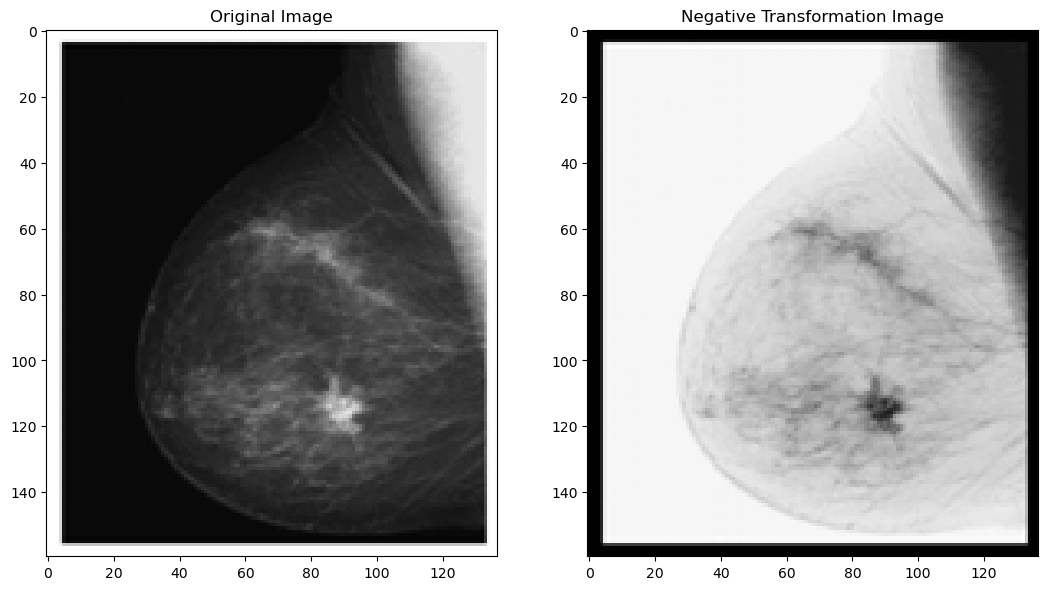

In [10]:
'''
1
Negative Transformation

Read image ‘Picture1.png’ 
• Define function ‘Negative’ that apply Negative 
transformation for any image 
and any threshold. What is the equation??? 
• Call the function and apply it on the image ‘Picture1.png’ 
• Display the image before and after transformation in the same figure. 
'''

def negative_transformation(img):
    processed_img = img.copy()
    W = img.shape[1]
    H = img.shape[0]
    for i in range(H):
        for j in range(W):
            processed_img[i][j] = 255 - img[i][j]
    return processed_img


grey_img = rgb2gray((io.imread('imgs/Picture1.png')[:, :, :3]))
negative_transformation_img = negative_transformation(grey_img)
show_images([grey_img,negative_transformation_img], ['Original Image','Negative Transformation Image'])



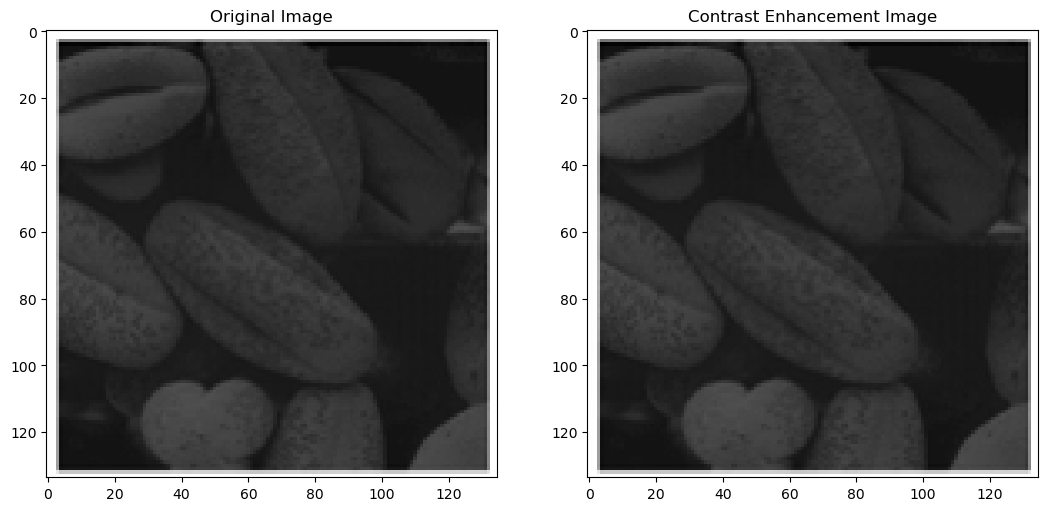

In [20]:
'''
2
Contrast Enhancement

Read image ‘Picture2.png’ 
• Define function ‘Contrast_enhancement’ that Stretches the grey levels in the 
range 0 to 100 into the range 50 – 200 and leaves other levels non changed. 
What is the equation???   
• hint: draw the spectrum of levels to know the equation, use for loops and if 
statements(or matrix conditional indexing which is faster but a little tricky) in 
the implementation. 
• Call the function and apply it on the image ‘Picture2.png’ 
• Display the image before and after transformation in the same figure.
'''
def contrast_enhancement(img):
    processed_img = img.copy()
    W = img.shape[1]
    H = img.shape[0]
    for i in range(H):
        for j in range(W):
            if 0 <= img[i][j] <= 100:
                processed_img[i][j] = 50 + 1.5*img[i][j]
    return processed_img

grey_img = rgb2gray((io.imread('imgs/Picture2.png')[:, :, :3]))
contrast_enhancement_processed_img = contrast_enhancement(grey_img)
show_images([grey_img,contrast_enhancement_processed_img], ['Original Image','Contrast Enhancement Image'])


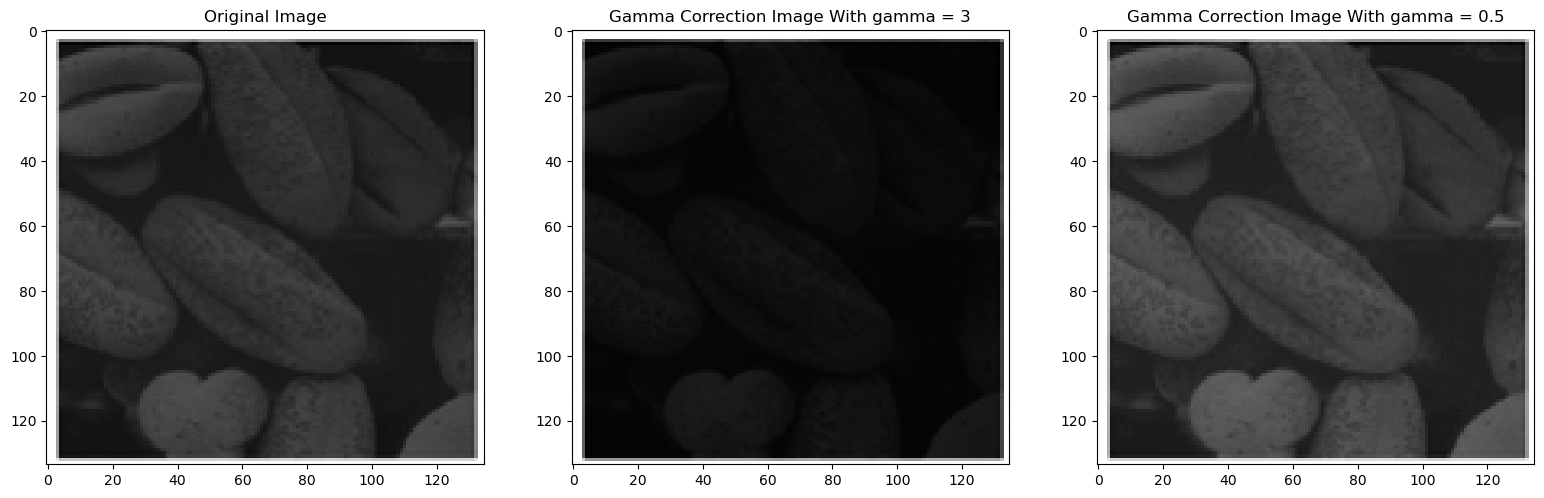

In [33]:
'''
3
Gamma Correction

Read image ‘Picture2.png’ 
• Define function ‘Gamma_Correction’ that 
Stretches the grey levels according 
to the gamma equation. (𝐴′=𝑐∗𝐴𝛾 )  .
Call the function with  𝑐=1 and 𝛾 =3  and 𝑐=1 and 𝛾 =0.5 
• Display the images before and after transformation in the same figure. 
• What is the effect of decreasing  𝛾 ? 
'''
def gamma_correction(img,gamma,c=1):
    processed_img = img.copy()
    W = img.shape[1]
    H = img.shape[0]
    for i in range(H):
        for j in range(W):
            processed_img[i][j] = c * (img[i][j]**gamma)
    return processed_img

gamma_correction_processed_img_large_gamma = gamma_correction(grey_img,gamma=3)
gamma_correction_processed_img_small_gamma = gamma_correction(grey_img,gamma=0.5)
show_images([grey_img,gamma_correction_processed_img_large_gamma,gamma_correction_processed_img_small_gamma], 
            ['Original Image','Gamma Correction Image With gamma = 3','Gamma Correction Image With gamma = 0.5'])


In [ ]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''

def getImageWithHist(name,ext,nbins=256):
    pass
    


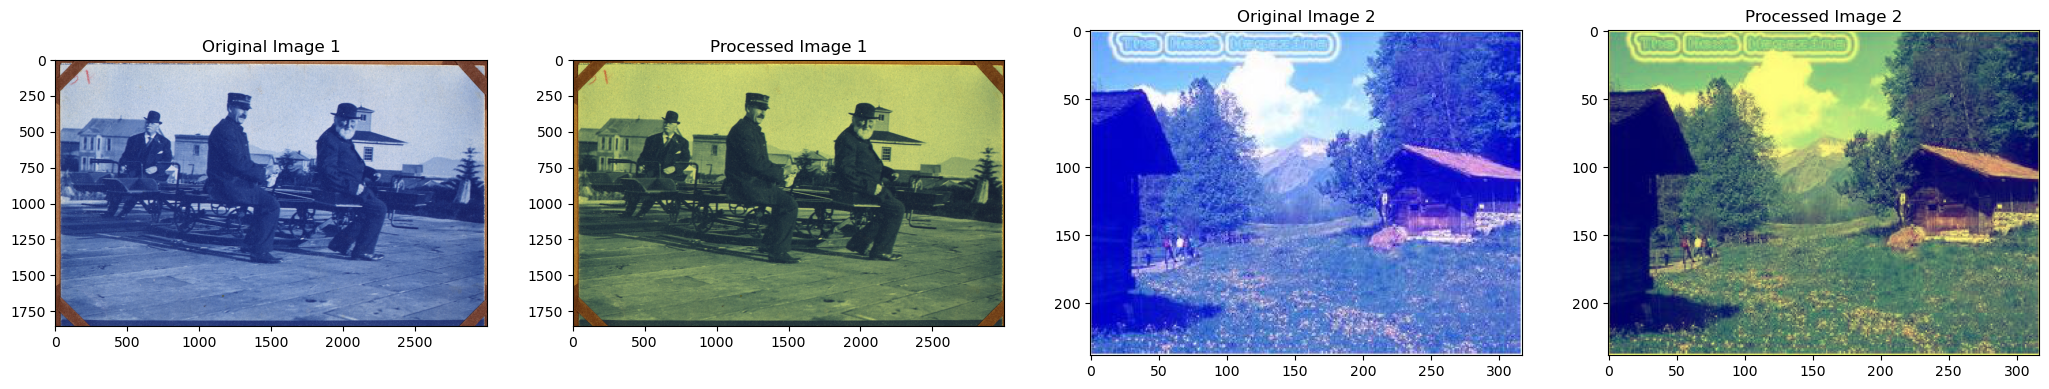

In [37]:
'''
5 Extra Task
    A blue light was used during image acquisition that 
    makes the image looks more bluish as seen in files 1.jpg and 2.jpg. 
    Eliminate the effect of this extra blue in the image.

'''
def remove_blue_light(img):
    processed_img = img.copy()
    W = img.shape[1]
    H = img.shape[0]
    for i in range(H):
        for j in range(W):
            processed_img[i][j][2] = 0.5*img[i][j][2]
    return processed_img
img1 = io.imread("1.jpg")
img2 = io.imread("2.jpg")
processed_img1 = remove_blue_light(img1)
processed_img2 = remove_blue_light(img2)
show_images([img1,processed_img1,img2,processed_img2], ['Original Image 1','Processed Image 1','Original Image 2','Processed Image 2'])

